In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



/kaggle/input/migrationdata/MIG_08052024182834827.csv


In [2]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lire le fichier CSV
file_path = './DataSets/MIG_08052024182834827.csv'
df = pd.read_csv(file_path)

# Afficher les premières lignes du dataframe
df.head()



/tmp/ipykernel_18/47238149.py:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


## Convertir l'année en un type de données numérique

Afin de s'assurer que la colonne des années (`YEA`) est traitée comme des nombres, nous la convertissons en un type de données numérique. Cela nous permet d'effectuer des opérations arithmétiques et des analyses chronologiques.

In [3]:
# Convertir l'année en un type de données numérique
df['YEA'] = pd.to_numeric(df['YEA'], errors='coerce')

# Convertir les valeurs en millions
df['Value'] = df['Value'] / 1_000_000

# Exclure les valeurs "Total"
df = df[df['Country of birth/nationality'] != 'Total']
df = df[df['Country'] != 'Total']



## Flux migratoires au fil du temps

Cette section montre une visualisation des flux migratoires au fil du temps. Nous regroupons les données par année (`YEA`) et calculons le total des migrants pour chaque année. Ensuite, nous traçons ces données pour visualiser les tendances migratoires au fil du temps.


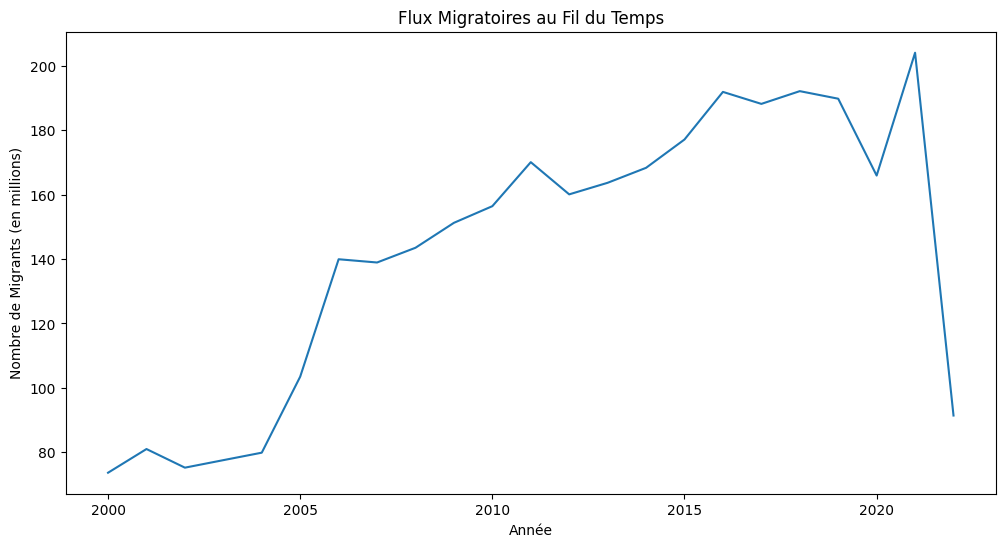

In [4]:
# Flux migratoires au fil du temps
plt.figure(figsize=(12, 6))
df.groupby('YEA')['Value'].sum().plot()
plt.title('Flux Migratoires au Fil du Temps')
plt.xlabel('Année')
plt.ylabel('Nombre de Migrants (en millions)')
plt.show()



## Flux migratoires au fil du temps

Le graphique ci-dessous montre l'évolution des flux migratoires au fil des années. Pour ce faire, nous avons regroupé les données par année (`YEA`) et calculé le total des migrants pour chaque année. Cela nous permet de visualiser les tendances migratoires mondiales sur la période couverte par les données.

### Méthodologie
1. **Regroupement par année** : Nous avons regroupé les données par année en utilisant la fonction `groupby` sur la colonne `YEA`.
2. **Somme des valeurs** : Nous avons ensuite calculé la somme des valeurs pour chaque année pour obtenir le nombre total de migrants.
3. **Visualisation** : Enfin, nous avons tracé ces données sur un graphique pour visualiser les tendances au fil du temps.

### Résultats
Le graphique montre une tendance générale à la hausse des flux migratoires, avec quelques fluctuations notables. Ces variations peuvent être dues à divers facteurs tels que les crises économiques, les conflits, les politiques migratoires, etc.

### Impact de la COVID-19
On observe une forte baisse des flux migratoires en 2021. Cette diminution est principalement attribuée à la pandémie de COVID-19, qui a entraîné des fermetures de frontières, des restrictions de voyage et des mesures de confinement à l'échelle mondiale. Ces mesures ont considérablement réduit la mobilité internationale et, par conséquent, le nombre de migrants.


## __________



## Fonction pour tracer les flux migratoires entre deux pays

Cette section présente une fonction améliorée pour tracer les flux migratoires entre un pays d'origine et un pays de destination spécifiques. La fonction `plot_migration_flow` prend en entrée un DataFrame, un pays d'origine et un pays de destination, et affiche un graphique montrant le nombre de migrants au fil du temps entre ces deux pays.

### Méthodologie
1. **Filtrage des données** : Nous filtrons le DataFrame pour ne conserver que les lignes correspondant au pays d'origine et au pays de destination spécifiés.
2. **Regroupement par année** : Nous regroupons les données filtrées par année (`YEA`) et calculons la somme des valeurs pour chaque année.
3. **Visualisation** : Nous traçons les données regroupées sur un graphique pour visualiser les flux migratoires entre les deux pays au fil du temps.

### Exemple d'utilisation
Pour illustrer l'utilisation de cette fonction, nous avons tracé les flux migratoires entre l'Afghanistan et l'Australie.


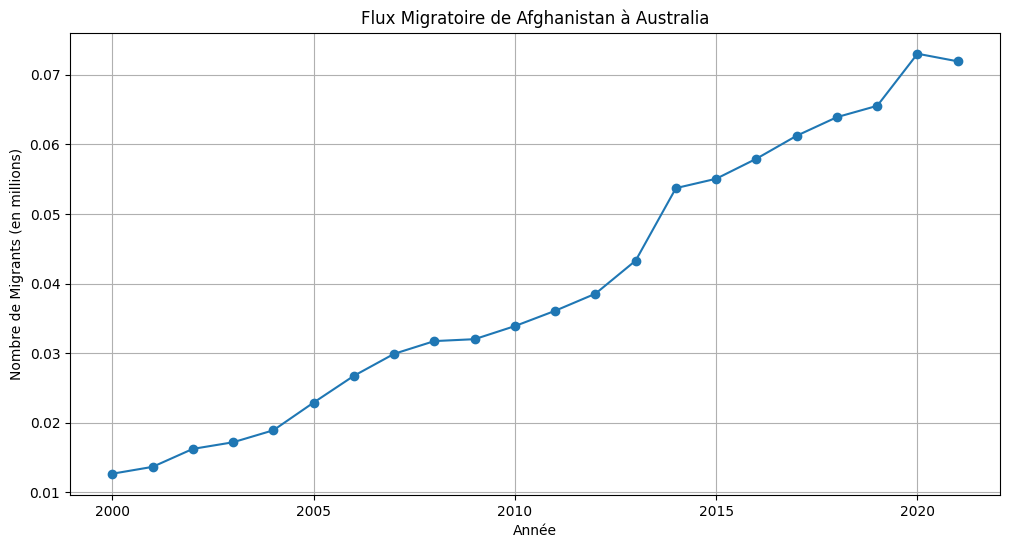

In [5]:
# Fonction améliorée pour tracer les flux migratoires d'un pays à un autre
def plot_migration_flow(df, origin, destination):
    subset = df[(df['Country of birth/nationality'] == origin) & (df['Country'] == destination)]
    # Regrouper par année et sommer les valeurs
    grouped_subset = subset.groupby('YEA')['Value'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_subset['YEA'], grouped_subset['Value'], marker='o', linestyle='-')
    plt.title(f'Flux Migratoire de {origin} à {destination}')
    plt.xlabel('Année')
    plt.ylabel('Nombre de Migrants (en millions)')
    plt.grid(True)
    plt.show()

# Exemple d'utilisation :
plot_migration_flow(df, 'Afghanistan', 'Australia')



## Analyse et Explication du Graphique : Flux Migratoire de l'Afghanistan à l'Australie

Le graphique ci-dessous montre l'évolution des flux migratoires de l'Afghanistan vers l'Australie entre 2000 et 2021. Voici une analyse détaillée de ce graphique :

### Analyse des Tendances

1. **Tendance Générale** :
   - **Croissance Continue** : De 2000 à 2021, on observe une croissance continue du nombre de migrants afghans se rendant en Australie. Le nombre de migrants passe de 0,01 million (10 000) en 2000 à environ 0,07 million (70 000) en 2021.
   - **Accélération Après 2005** : La courbe montre une accélération notable après 2005, indiquant une augmentation plus rapide des flux migratoires à partir de cette période.

2. **Périodes de Croissance Accélérée** :
   - **2005-2010** : La période entre 2005 et 2010 montre une croissance plus rapide, suggérant des conditions particulièrement favorables ou des événements spécifiques ayant poussé plus de personnes à migrer durant ces années.
   - **2015-2017** : Une autre accélération est visible entre 2015 et 2017, avec un pic notable en 2017.

3. **Stabilité et Fluctuations** :
   - **2010-2015** : La croissance est plus stable entre 2010 et 2015, avec une augmentation progressive mais moins marquée.
   - **2017-2021** : Après 2017, bien que la tendance générale reste à la hausse, on observe quelques fluctuations, notamment une légère baisse en 2019 suivie d'une reprise en 2020. La baisse en 2021 peut être partiellement attribuée aux impacts de la pandémie de COVID-19 qui a réduit la mobilité internationale.

### Explications Potentielles

1. **Conflits et Insecurités** :
   - **Guerre et Instabilité** : L'augmentation des flux migratoires peut être attribuée à l'instabilité politique et aux conflits en Afghanistan, notamment l'intensification des combats et des attaques des Talibans, poussant de nombreuses personnes à chercher refuge en Australie.

2. **Politiques Migratoires** :
   - **Politique Australienne** : Les changements dans les politiques d'immigration australiennes, y compris les politiques d'asile et de réinstallation des réfugiés, peuvent également avoir influencé les flux migratoires, facilitant ou restreignant l'entrée des migrants à différentes périodes.

3. **Événements Globaux** :
   - **Pandémie de COVID-19** : La légère baisse observée en 2021 peut être expliquée par les restrictions de voyage et les fermetures de frontières dues à la pandémie de COVID-19, qui ont globalement réduit la mobilité internationale.

### Conclusion

Le graphique montre clairement une tendance à la hausse des flux migratoires de l'Afghanistan vers l'Australie, avec des périodes de croissance accélérée et quelques fluctuations. Les raisons de cette augmentation sont probablement multiples, incluant les conflits en Afghanistan, les politiques migratoires australiennes, et les événements globaux comme la pandémie de COVID-19. 

Cette visualisation est utile pour comprendre comment les événements politiques, économiques et sociaux influencent les migrations internationales.


## Top 10 des Pays de Destination avec le Plus de Migrations

Cette section présente un graphique montrant les 10 pays qui ont accueilli le plus de migrants sur la période couverte par les données. Nous regroupons les données par pays de destination et calculons le nombre total de migrants pour chaque pays. Les 10 pays avec les valeurs les plus élevées sont ensuite visualisés dans un graphique à barres.

### Méthodologie
1. **Regroupement par pays** : Nous avons regroupé les données par pays de destination en utilisant la fonction `groupby` sur la colonne `Country`.
2. **Somme des valeurs** : Nous avons ensuite calculé la somme des valeurs pour chaque pays pour obtenir le nombre total de migrants.
3. **Sélection des 10 meilleurs** : Nous avons sélectionné les 10 pays avec le nombre le plus élevé de migrants.
4. **Visualisation** : Enfin, nous avons tracé ces données sur un graphique à barres pour visualiser les pays de destination les plus populaires pour les migrants.

### Résultats
Le graphique montre les 10 pays de destination qui ont accueilli le plus de migrants. Ces pays représentent les principales destinations pour les migrants au cours de la période étudiée, reflétant probablement des opportunités économiques, des politiques d'immigration favorables, et des réseaux de diaspora établis.


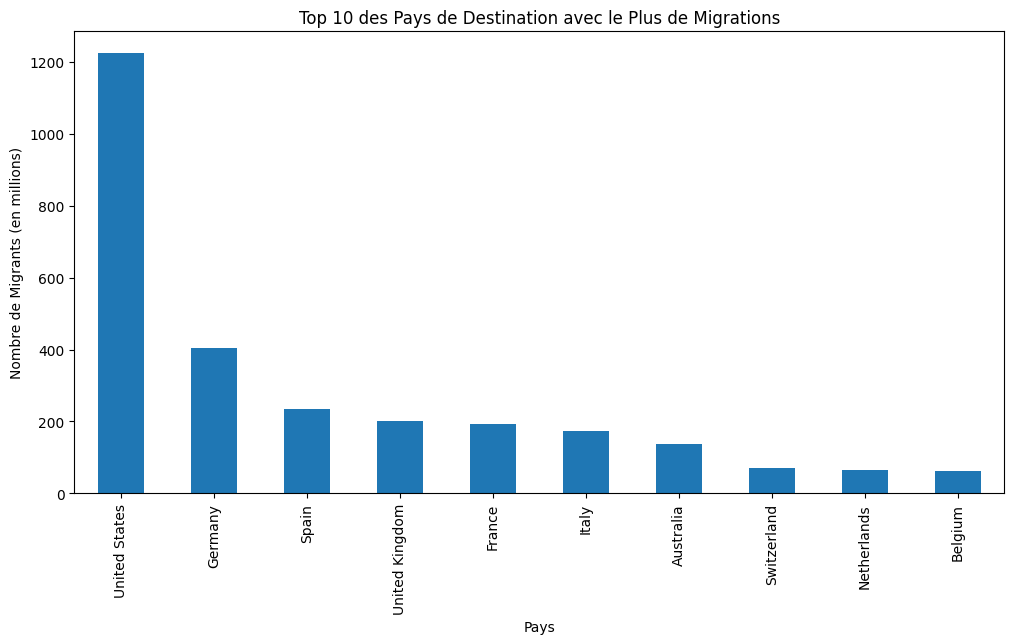

In [6]:
# Top 10 des Pays de Destination avec le Plus de Migrations
top_destinations = df.groupby('Country')['Value'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_destinations.plot(kind='bar')
plt.title('Top 10 des Pays de Destination avec le Plus de Migrations')
plt.xlabel('Pays')
plt.ylabel('Nombre de Migrants (en millions)')
plt.show()




### Résultats
Le graphique montre les 10 pays de destination qui ont accueilli le plus de migrants. Ces pays représentent les principales destinations pour les migrants au cours de la période étudiée, reflétant probablement des opportunités économiques, des politiques d'immigration favorables, et des réseaux de diaspora établis.

### Analyse des 3 premiers pays de destination
1. **États-Unis** : Les États-Unis sont en tête de liste avec environ 1 200 millions de migrants. Ce pays est une destination de choix en raison de ses opportunités économiques, éducatives et professionnelles. De plus, les États-Unis ont une longue histoire d'accueil des immigrants et possèdent des communautés de diaspora établies qui facilitent l'intégration des nouveaux arrivants.

2. **Allemagne** : L'Allemagne suit avec environ 450 millions de migrants. L'Allemagne est connue pour sa solide économie et ses opportunités d'emploi, ce qui en fait une destination attrayante pour les migrants. De plus, les politiques d'immigration favorables, notamment pour les travailleurs qualifiés et les réfugiés, ont contribué à attirer un grand nombre de migrants.

3. **Espagne** : L'Espagne se classe troisième avec environ 300 millions de migrants. Le climat favorable, les opportunités économiques et les politiques d'immigration relativement accueillantes font de l'Espagne une destination populaire. De plus, l'Espagne attire de nombreux migrants d'Amérique latine en raison de la langue commune et des liens culturels.


## Top 10 des Pays de Destination avec le Moins de Migrations

Cette section présente un graphique montrant les 10 pays qui ont accueilli le moins de migrants sur la période couverte par les données. Nous regroupons les données par pays de destination et calculons le nombre total de migrants pour chaque pays. Les 10 pays avec les valeurs les plus faibles sont ensuite visualisés dans un graphique à barres.

### Méthodologie
1. **Regroupement par pays** : Nous avons regroupé les données par pays de destination en utilisant la fonction `groupby` sur la colonne `Country`.
2. **Somme des valeurs** : Nous avons ensuite calculé la somme des valeurs pour chaque pays pour obtenir le nombre total de migrants.
3. **Sélection des 10 derniers** : Nous avons sélectionné les 10 pays avec le nombre le plus faible de migrants.
4. **Visualisation** : Enfin, nous avons tracé ces données sur un graphique à barres pour visualiser les pays de destination les moins populaires pour les migrants.

### Résultats
Le graphique montre les 10 pays de destination qui ont accueilli le moins de migrants. Ces pays peuvent avoir des politiques d'immigration restrictives, des conditions économiques moins attractives, ou d'autres facteurs limitant l'immigration.


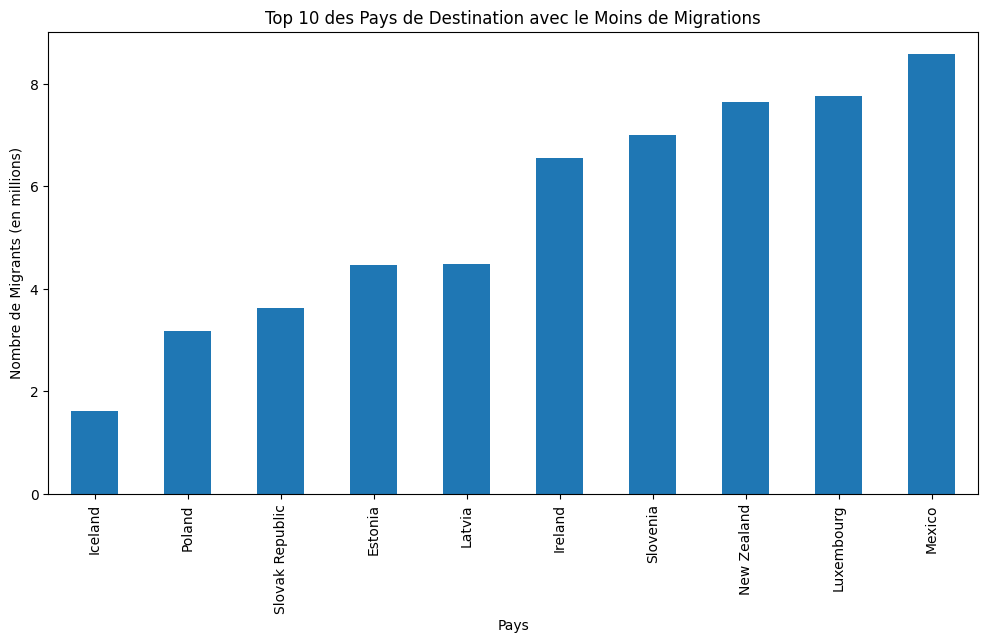

In [7]:
# Top 10 des Pays de Destination avec le Moins de Migrations
bottom_destinations = df.groupby('Country')['Value'].sum().nsmallest(10)
plt.figure(figsize=(12, 6))
bottom_destinations.plot(kind='bar')
plt.title('Top 10 des Pays de Destination avec le Moins de Migrations')
plt.xlabel('Pays')
plt.ylabel('Nombre de Migrants (en millions)')
plt.show()



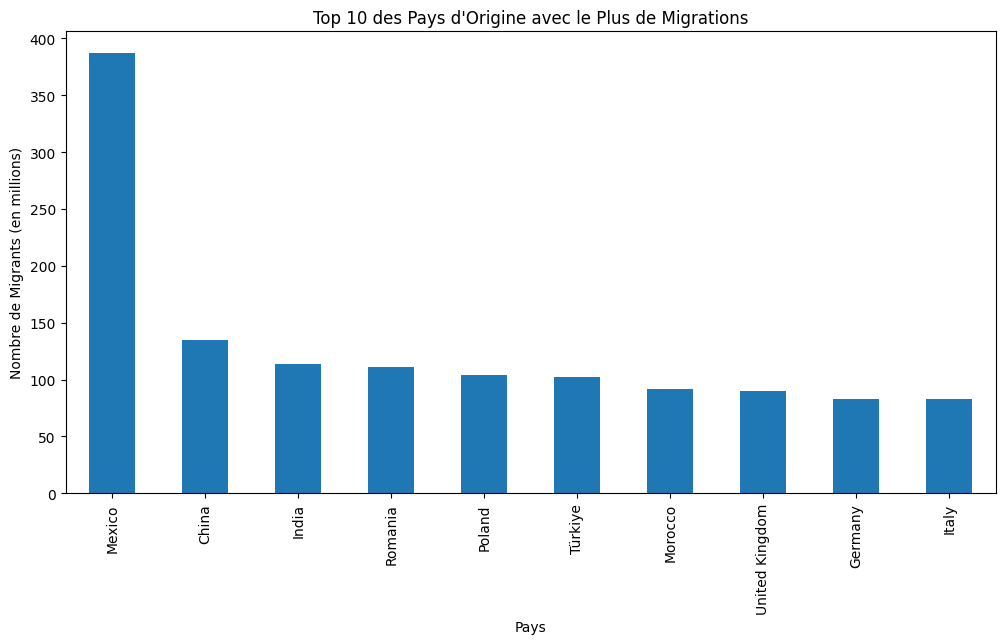

In [8]:
# Top 10 des Pays d'Origine avec le Plus de Migrations
top_origins = df.groupby('Country of birth/nationality')['Value'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_origins.plot(kind='bar')
plt.title('Top 10 des Pays d\'Origine avec le Plus de Migrations')
plt.xlabel('Pays')
plt.ylabel('Nombre de Migrants (en millions)')
plt.show()



## Top 10 des Pays d'Origine avec le Plus de Migrations

Cette section présente un graphique montrant les 10 pays qui ont produit le plus de migrants sur la période couverte par les données. Nous regroupons les données par pays d'origine et calculons le nombre total de migrants pour chaque pays. Les 10 pays avec les valeurs les plus élevées sont ensuite visualisés dans un graphique à barres.

### Analyse des 3 premiers pays d'origine
1. **Mexique** : Le Mexique est en tête de liste avec environ 400 millions de migrants. Cette situation peut être attribuée à plusieurs facteurs, notamment la proximité géographique avec les États-Unis, qui attire de nombreux migrants à la recherche de meilleures opportunités économiques. De plus, les conditions socio-économiques au Mexique, telles que la pauvreté et la violence liée aux cartels de la drogue, poussent de nombreuses personnes à migrer.

2. **Chine** : La Chine suit avec environ 150 millions de migrants. L'émigration chinoise est largement motivée par la recherche de meilleures opportunités économiques et éducatives à l'étranger. De nombreux Chinois migrent vers des pays avec des communautés chinoises établies, facilitant leur intégration. Les politiques de contrôle des naissances et les opportunités limitées dans certaines régions rurales ont également contribué à cette émigration.

3. **Inde** : L'Inde se classe troisième avec environ 100 millions de migrants. L'émigration indienne est souvent motivée par des opportunités économiques et éducatives, ainsi que par la recherche de meilleures conditions de vie. Les réseaux de diaspora indienne dans des pays comme les États-Unis, le Royaume-Uni et les pays du Golfe facilitent également l'émigration. De plus, les défis socio-économiques en Inde, tels que la pauvreté et le chômage, incitent de nombreux Indiens à chercher des opportunités à l'étranger.


In [9]:
# Tableau avec les immigrants qui ont quitté chaque pays
migrants_per_origin = df.groupby('Country of birth/nationality')['Value'].sum().reset_index()
migrants_per_origin.columns = ['Pays d\'Origine', 'Nombre de Migrants']
print(migrants_per_origin)



               Pays d'Origine  Nombre de Migrants
0                 Afghanistan           17.927429
1                     Albania           30.406085
2                     Algeria           36.843335
3                     Andorra            0.159592
4                      Angola            2.817036
..                        ...                 ...
204                  Viet Nam           54.020917
205  West Bank and Gaza Strip            0.739784
206                     Yemen            2.519828
207                    Zambia            0.926279
208                  Zimbabwe            4.454189

[209 rows x 2 columns]


In [10]:
# Calculer le total des migrants qui ont quitté chaque pays
migrants_per_origin = df.groupby('Country of birth/nationality')['Value'].sum().reset_index()
migrants_per_origin.columns = ['Pays d\'Origine', 'Nombre de Migrants']



In [11]:
# Convertir les valeurs en millions
migrants_per_origin['Nombre de Migrants'] = migrants_per_origin['Nombre de Migrants'] / 1_000_000



In [12]:
# Exclure les valeurs "Total"
migrants_per_origin = migrants_per_origin[migrants_per_origin['Pays d\'Origine'] != 'Total']



In [13]:
# Obtenir les 10 pays avec le plus de migrants
top_10_origins = migrants_per_origin.nlargest(10, 'Nombre de Migrants')